<a href="https://colab.research.google.com/github/MarkKrickovich/MarkKrickovich/blob/main/Save_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.32-1ubuntu1).
libgconf-2-4 is already the newest version (3.2.6-4ubuntu1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [21]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2021-12-15 16:40:51--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2021-12-15 16:40:51--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.1’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2021-12-15 16:40:51 (272 MB/s) - ‘AgesAndHeights.pkl.1’ saved [2406/2406]



In [22]:
data = pd.read_pickle('AgesAndHeights.pkl')
data

Age     Height
0   14.767874  59.627484
1    3.107671  36.146453
2    7.266917  46.912878
3    1.815180  29.125660
4   16.753758  68.170414
..        ...        ...
95   7.323712  46.857505
96   5.591509  39.339990
97   2.625606  32.918925
98   5.519293  40.704154
99  13.117413  55.177407

[100 rows x 2 columns]

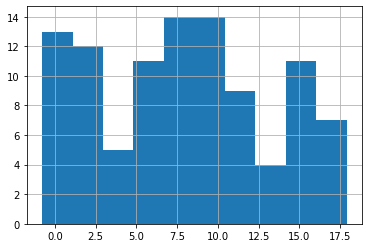

In [23]:
## NOTE FROM HISTOGRAM THAT NEGATIVE RESULTS ARE SHOWN.
ages = data['Age']
heights = data['Height']
ages.hist()

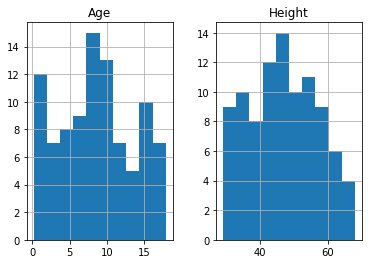

In [24]:
## DELETE NEGATIVE AGES - CHECK BOTH 
data = data[ages>0]
#REDEFING AGES & HEIGHTS VARIABLES AFTER EXCLUDING NEGATIVES
ages = data['Age']
heights = data['Height']
data.hist();

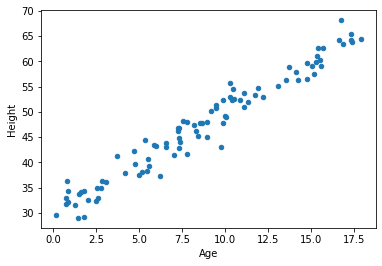

In [25]:
#MAKE SCATTER PLOT TO CHECK THE DISTRIBUTION OF THE DATA
data.plot.scatter(x='Age',y='Height');

In [26]:
#MAKE INTERACTIVE PLOTLYT SCATTER PLOT
fig = px.scatter(x=ages, y=heights,title="Ages v Heights",labels={'x':'Age','y':'Height'})
fig.show()                                                                     

In [27]:
#CONVERT VARIABLES TO NUMPY BC SCIKIT LEARN'S LINEAR REGRESSION NEEDS THEM AS NUMPY ARRAYS. 
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()
ages_np

array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
        5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
        8.2969588 , 14.74948482, 15.28545214, 16.65534197,  0.85918789,
        8.43332999, 11.92386163,  0.76828323, 11.36202254,  1.29597926,
       10.31206094, 17.39335272, 10.31003056,  6.23764582, 15.55153122,
        2.77346425, 15.59798962,  7.57789784,  2.04165705,  9.90665221,
        2.87252515,  1.54231936,  5.46202264, 15.04362695,  5.99372597,
        4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
        0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
        0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
        0.75192511,  6.5963469 ,  9.75112683,  7.40094567, 17.32712575,
       10.53406938, 15.16816596,  9.46971876, 13.54691548,  7.80132294,
        2.51910344,  4.71666526, 10.0386595 , 11.77125476,  8.53738026,
        2.58355771,  1.438003  , 10.40642157, 16.85933332, 12.22

In [28]:
ages_np.shape

(93,)

In [29]:
heights_np.shape

(93,)

In [30]:
#CONVERT SHAPTE OF THE AGE VARIABLE TO ALLOW SCIKIT-LEARN TO READ X PROPERLY
#WHICH IS INTO A MATRIX
ages_np_reshaped = ages_np.reshape(len(ages),1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [31]:
ages_np_reshaped.shape

(93, 1)

In [32]:
#SCIKIT LEARN SIMPLE LINEAR REGRESSION
model = LinearRegression().fit(ages_np_reshaped,heights_np)
#LOOK AT COEFFICIENT
model.coef_
#for a one unit increase (year), on average the height will increase by 2 units (inches)

array([2.0014169])

In [33]:
#CREATE PLOTLY CHART:
x_new = np.array(list(range(19))).reshape(19,1)  #MAKES A LIST OF INTEGERS 0 TO 18 
#RESHAPE INTO NP MATRIX
preds = model.predict(x_new)
#CREATE PLOTLY CHART WITH A LINE
fig = px.scatter(x=ages, y=heights,title="Ages v Heights",labels={'x':'Age','y':'Height'})
fig.add_trace(go.Scatter(x=x_new.reshape(19),y=preds, mode='lines', name='Model'))
fig.write_image('base_pic.svg', width=800) 
fig.show()                                                                    

In [49]:
#LOAD JOBLIB SO WE CAN SAVE IT TO A FILE (dump) AND LOAD IT FROM A FILE (load).
#NEED TO PASS A MODEL THAT IS IN MEMORY AND A FILENAME FOLLOWED BY .joblib
from joblib import dump,load
load = import joblib
joblib.dump('model','model.joblib')#SAVE THE MODEL


SyntaxError: ignored

In [46]:
#LOAD FILE (MODEL)INTO MEMORY
loaded_model = joblib.load('model.joblib')
loaded_model

'model'

In [47]:
#MAKE A PREDICTION TO TEST THE DUMP AND LOAD PROCESS
model.predict(np.array([[17]]))

array([63.9859449])

# New Section

In [37]:
model

LinearRegression()

In [38]:
type(x_new)

numpy.ndarray

In [39]:
loaded_model

'model'

In [40]:
#NOW DOWNLOAD THE FILE (VIA JOBLIB LOADED_MODEL COMMAND ABOVE) AND 
#PUT IT INTO A FLASK APPLICATION
#COMPLETED IN VS CODE - BUT RETURNED ERROR:AttributeError: 'str' object has no attribute 'predict'
#related to preds = model.predict(test_np_input)
#NO SOLUTION Available.


In [41]:
#FUNCTION FOR USE IN FLASK APP:
#Make Function to take user inputs, then produce model outputs and then
#outputs a graph picture file (svg)
#Function below is modularized version of all the code above, to run on Flask easier
#NOTE: The orca executable is required to export figures as static images (colido to be used in Flask instead)
def make_picture(training_data_filename, model, new_inp_arr,output_file): #new-inp_arr is the input as np array, output_file is name of image file
  data = pd.read_pickle(training_data_filename) #loads raw dataframe
  ages = data['Age']
  data = data[ages>0]
  ages = data['Age']
  heights = data['Height']
  x_new = np.array(list(range(19))).reshape(19,1)  #MAKES A LIST OF INTEGERS 0 TO 18 
  #Make Plotly Graph
  #RESHAPE INTO NP MATRIX
  preds = model.predict(x_new)
  #CREATE PLOTLY CHART WITH A LINE
  fig = px.scatter(x=ages, y=heights,title="Ages v Heights",labels={'x':'Age','y':'Height'})
  fig.add_trace(go.Scatter(x=x_new.reshape(19),y=preds, mode='lines', name='Model'))
  
  new_preds = model.predict(new_inp_arr)  #Output
  fig.add_trace(go.Scatter(x=new_inp_arr.reshape(len(new_inp_arr)),y=new_preds, name="New Ouptuts", mode='markers',marker=dict(color='red', size=20,line=dict(color='red', width=1))))
  fig.write_image('base_pic.svg', width=800)  
  fig.show(); 


In [42]:
#CONVERING INPUT VALUES INTO NUMPY ARRAY
def floats_string_to_np_array(floats_str): #takes input floats_str
  def is_float(s):
    try:
      float(s)
      return True
    except:
      return False
  floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)]) #using python list comprehension syntax
  return floats.reshape(len(floats),1)

In [43]:
#TEST FUNCTION
make_picture('AgesAndHeights.pkl',model, floats_string_to_np_array('1,  3,  3.2,  '),'x.svg')

In [44]:
#TEST ABOVE FUNCTION - Should return all inputs as floats, in a numpy array.
floats_string_to_np_array('1,  3,  3.2,  ')  #Enter some spaces and other junk to test if code above cleans it

array([[1. ],
       [3. ],
       [3.2]])